In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import geo_tools, nc_tools, tidetools, viz_tools
import xarray as xr
from IPython.core.display import display, HTML
import scipy.signal as signal
import glob
import matplotlib.cm as cm
import datetime
import netCDF4 as nc
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
tracers = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV18-12')
ssh = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSgSurfaceTracerFields1hV18-12')
winds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [4]:
def make_stats(time_slice, location, graph = False):
    if location == 'salmon':
        ss_coords = [256,268]
        wind_coords = [99,159]
    if location == 'turn':
        ss_coords = [343,250]
        wind_coords = [116,150]
    if location == 'sog':
        ss_coords = [474,252]
        wind_coords = [143,141]
    sst_ts = (
    tracers.salinity
    .sel(depth=0.5, method='nearest')
    .isel(gridY=ss_coords[0], gridX=ss_coords[1])
    .sel(time=time_slice)
    )
    ssh_ts = (
    ssh.ssh
    .isel(gridY=ss_coords[0], gridX=ss_coords[1])
    .sel(time=time_slice)
    )
    u_winds = (
    winds.u_wind
    .isel(gridY=wind_coords[0], gridX=wind_coords[1])
    .sel(time=time_slice)
    )
    v_winds = (
    winds.v_wind
    .isel(gridY=wind_coords[0], gridX=wind_coords[1])
    .sel(time=time_slice)
    )
    wind_speed = np.sqrt(u_winds**2 + v_winds**2)
    
    print(location)
    
    print('surface salinity mean = ' + str(sst_ts.values.mean()))
    print('surface salinity min = ' + str(sst_ts.values.min()))
    print('surface salinity max = ' + str(sst_ts.values.max()))
    print('surface salinity std = ' + str(sst_ts.values.std()))
    
    print('ssh mean = ' + str(ssh_ts.values.mean()))
    print('ssh min = ' + str(ssh_ts.values.min()))
    print('ssh max = ' + str(ssh_ts.values.max()))
    print('ssh std = ' + str(ssh_ts.values.std()))
    
    print('wind speed mean = ' + str(wind_speed.values.mean()))
    print('wind speed min = ' + str(wind_speed.values.min()))
    print('wind speed max = ' + str(wind_speed.values.max()))
    print('wind speed std = ' + str(wind_speed.values.std()))
    
    if graph == True:
        fig, ax = plt.subplots(3,1,figsize=(18, 10))
        sst_ts.plot(ax=ax[0])
        ax[0].grid(axis='x')
        ax[0].set_title('Surface Salinity at')
        ax[0].set_xticklabels([])
        ax[0].set_xlabel([])
        
        ssh_ts.plot(ax=ax[1])
        ax[1].grid(axis='x')
        ax[1].set_title('Sea Surface Height')
        ax[1].set_xticklabels([])
        ax[1].set_xlabel([])

        wind_speed.plot(ax=ax[2])
        ax[2].grid(axis='x')
        ax[2].set_title('Wind Speed')

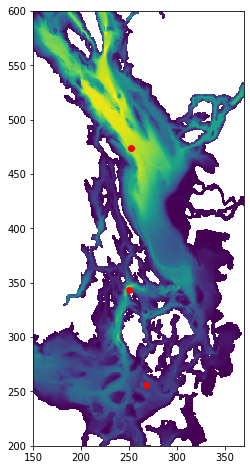

In [12]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.pcolormesh(grid.variables['Bathymetry'][:])
ax.plot(268,256, 'ro')
ax.plot(250,343, 'ro')
ax.plot(252,474, 'ro')
ax.set_ylim(200, 600)
ax.set_xlim(150, 370)
ax.set_aspect(5/4.4);

salmon
surface salinity mean = 28.622995
surface salinity min = 25.772886
surface salinity max = 29.600113
surface salinity std = 0.770413
ssh mean = -0.07442326
ssh min = -1.5208429
ssh max = 0.7534448
ssh std = 0.694019
wind speed mean = 2.4443173
wind speed min = 0.19673808
wind speed max = 5.3346863
wind speed std = 1.077369


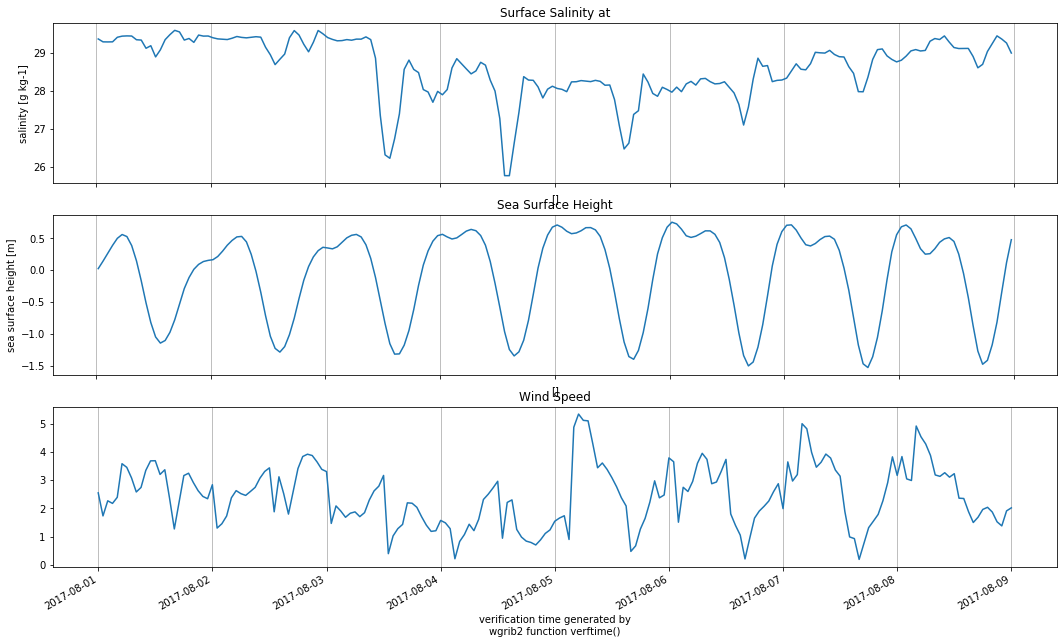

In [10]:
make_stats(slice('2017-08-01 00:00:00', '2017-08-09 00:00:00'), 'salmon', graph = True)

salmon
surface salinity mean = 30.613714
surface salinity min = 30.202116
surface salinity max = 30.988274
surface salinity std = 0.19044045
ssh mean = 0.12428833
ssh min = -1.7393131
ssh max = 1.3250235
ssh std = 0.82504237
wind speed mean = 10.353297
wind speed min = 2.7859263
wind speed max = 18.824238
wind speed std = 3.8098314


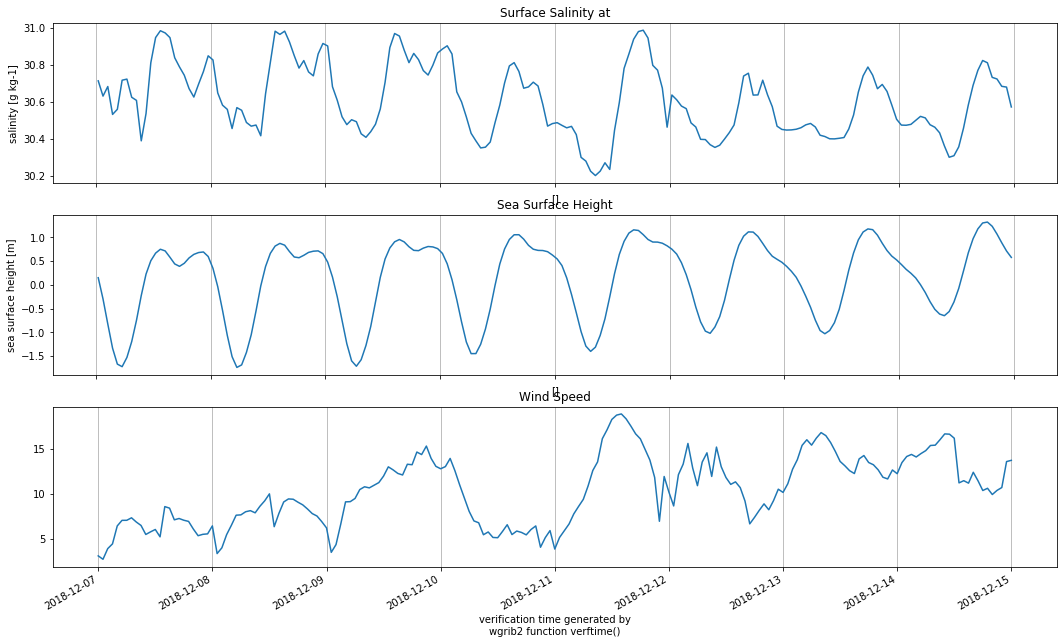

In [11]:
make_stats(slice('2018-12-07 00:00:00', '2018-12-15 00:00:00'), 'salmon', graph = True)

sog
surface salinity mean = 24.4815
surface salinity min = 20.571846
surface salinity max = 28.460833
surface salinity std = 2.5723822
ssh mean = -0.035505503
ssh min = -2.7365673
ssh max = 1.517486
ssh std = 1.1907862
wind speed mean = 4.991051
wind speed min = 0.22137183
wind speed max = 10.697575
wind speed std = 2.6342309


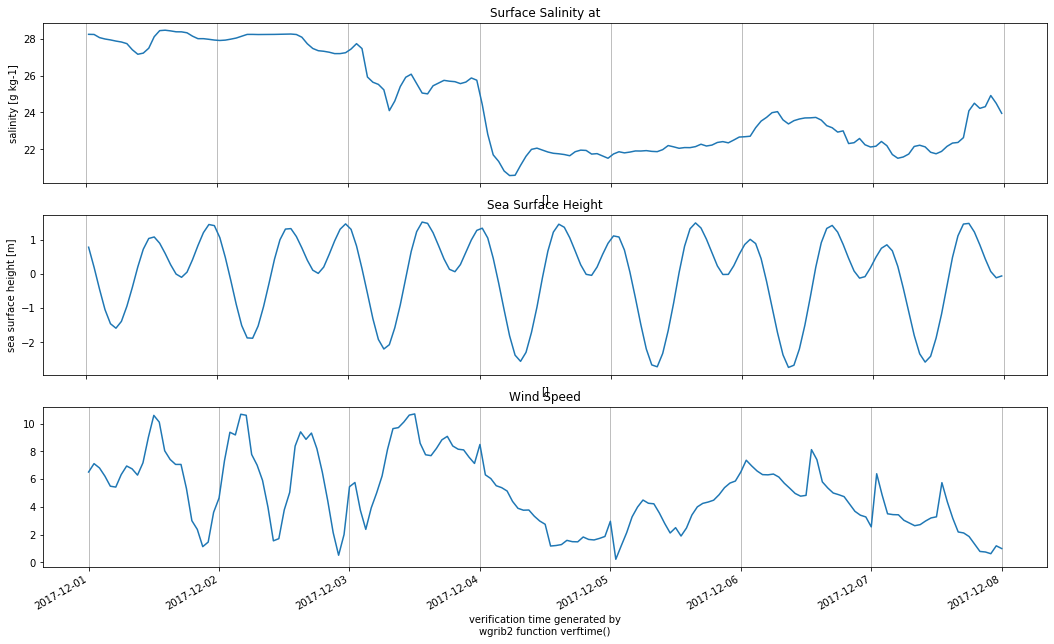

In [13]:
make_stats(slice('2017-12-01 00:00:00', '2017-12-08 00:00:00'), 'sog', graph = True)

sog
surface salinity mean = 22.45381
surface salinity min = 7.6837234
surface salinity max = 27.653238
surface salinity std = 5.3827524
ssh mean = -0.017147245
ssh min = -2.3747993
ssh max = 1.5861526
ssh std = 0.9770359
wind speed mean = 8.772892
wind speed min = 0.8944639
wind speed max = 15.800912
wind speed std = 3.3050547


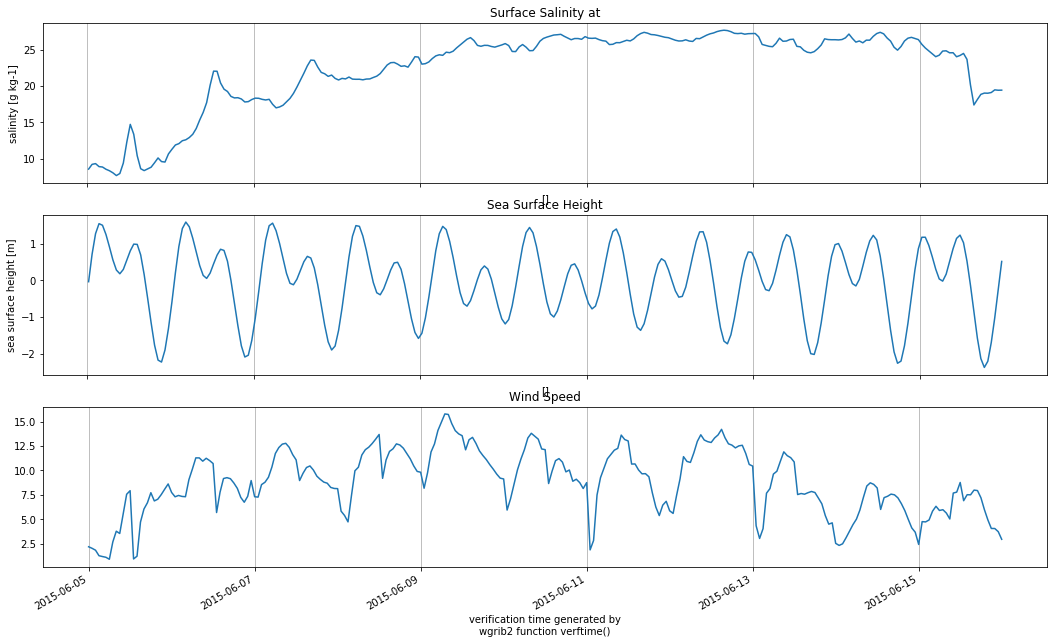

In [14]:
make_stats(slice('2015-06-05 00:00:00', '2015-06-16 00:00:00'), 'sog', graph = True)

sog
surface salinity mean = 22.035452
surface salinity min = 16.352785
surface salinity max = 25.17781
surface salinity std = 2.0282629
ssh mean = -0.054587025
ssh min = -2.2257335
ssh max = 1.459064
ssh std = 1.0273719
wind speed mean = 4.1269145
wind speed min = 0.11191178
wind speed max = 11.942832
wind speed std = 2.615062


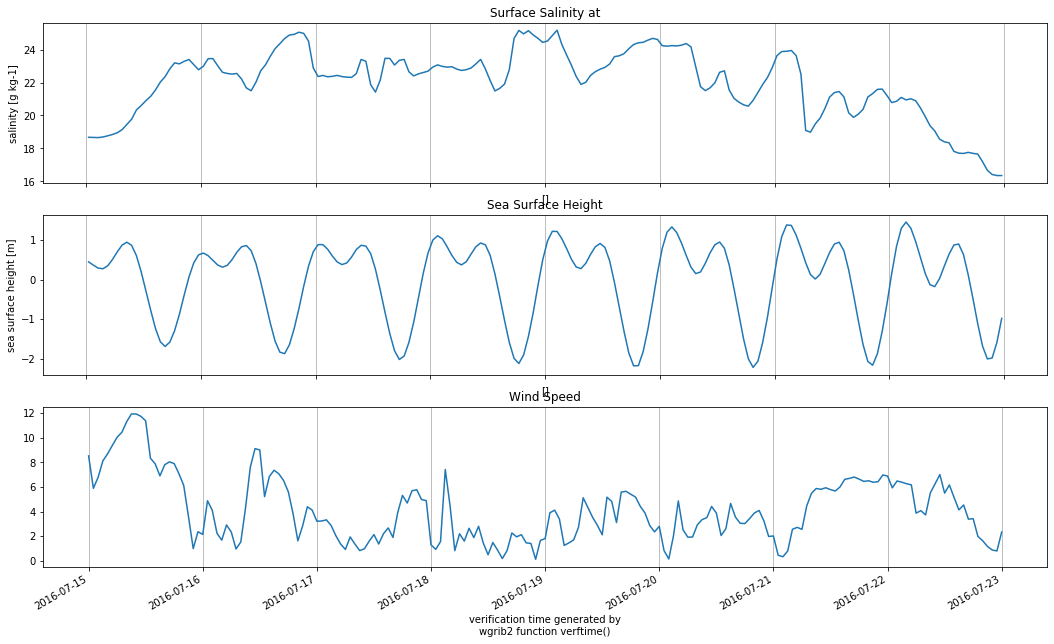

In [15]:
make_stats(slice('2016-07-15 00:00:00', '2016-07-23 00:00:00'), 'sog', graph = True)

sog
surface salinity mean = 23.318207
surface salinity min = 8.070126
surface salinity max = 27.857147
surface salinity std = 4.075552
ssh mean = 0.034667317
ssh min = -2.3557591
ssh max = 1.611856
ssh std = 1.0096025
wind speed mean = 8.154389
wind speed min = 0.075393364
wind speed max = 14.068599
wind speed std = 3.71591


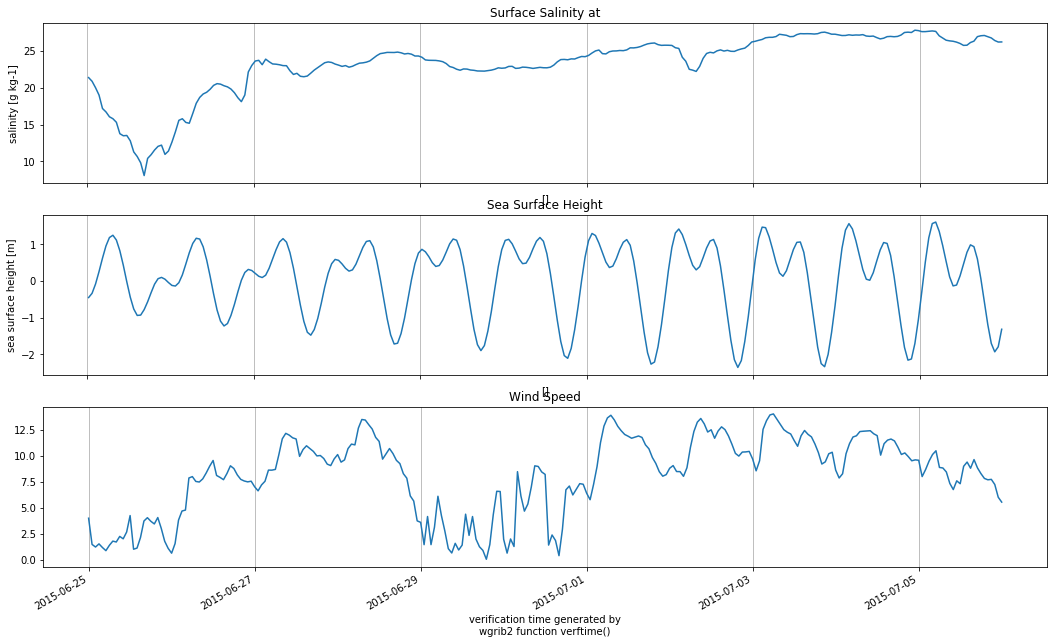

In [5]:
make_stats(slice('2015-06-25 00:00:00', '2015-07-06 00:00:00'), 'sog', graph = True)

sog
surface salinity mean = 23.367723
surface salinity min = 20.641962
surface salinity max = 25.564812
surface salinity std = 1.311568
ssh mean = -0.013570447
ssh min = -1.4707098
ssh max = 1.085928
ssh std = 0.711192
wind speed mean = 3.7033687
wind speed min = 0.14884728
wind speed max = 9.504968
wind speed std = 2.2932146


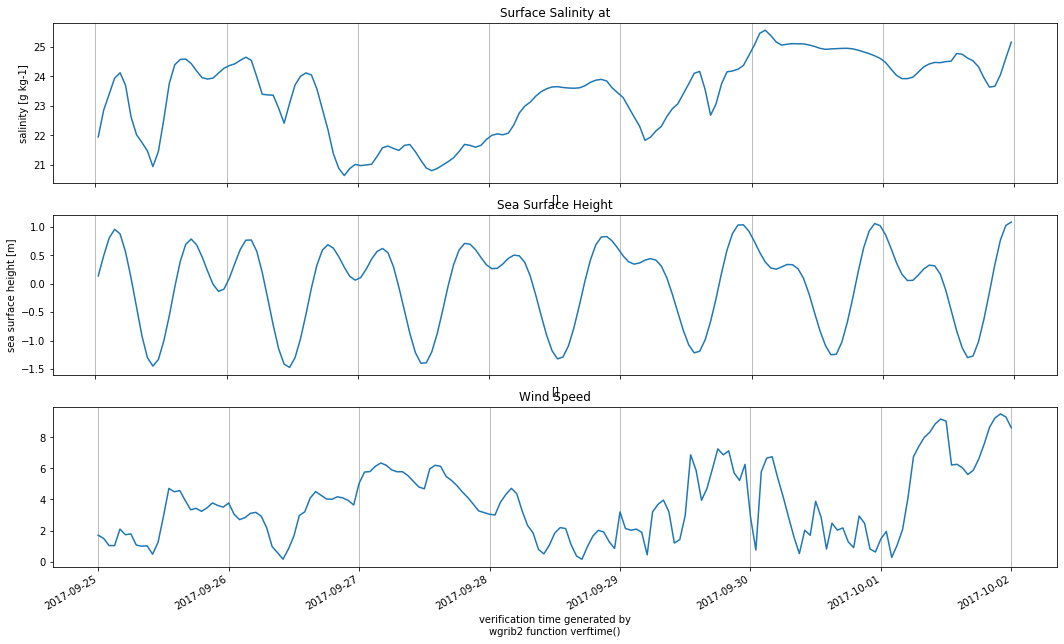

In [6]:
make_stats(slice('2017-09-25 00:00:00', '2017-10-02 00:00:00'), 'sog', graph = True)

turn
surface salinity mean = 30.285357
surface salinity min = 29.650639
surface salinity max = 30.710524
surface salinity std = 0.18757486
ssh mean = 0.46567452
ssh min = -0.8544738
ssh max = 1.5793858
ssh std = 0.62648356
wind speed mean = 8.468727
wind speed min = 0.2501264
wind speed max = 17.19906
wind speed std = 3.7801447


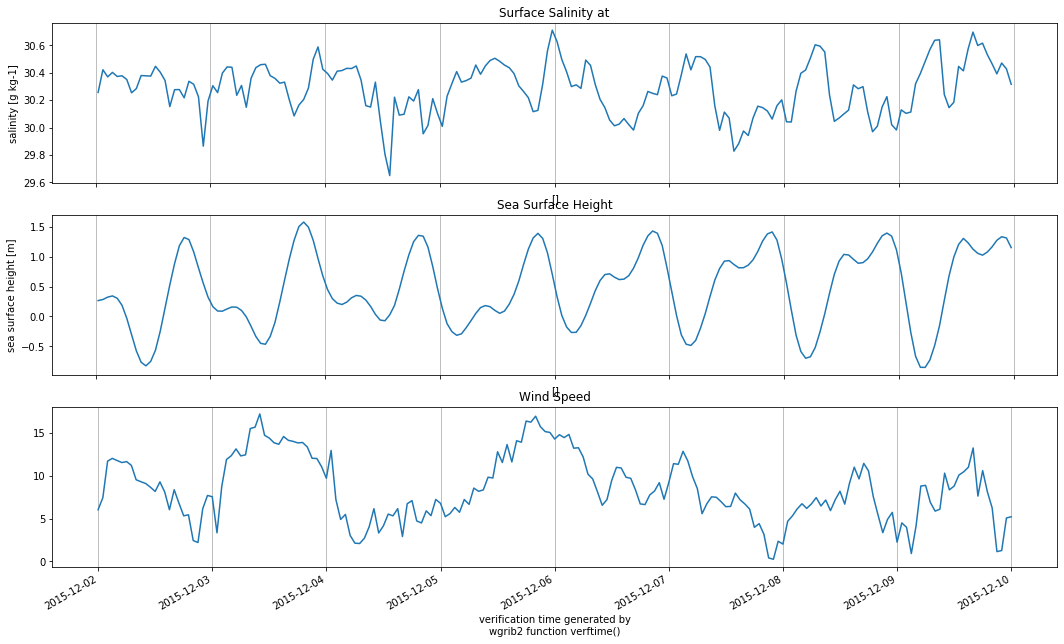

In [7]:
make_stats(slice('2015-12-02 00:00:00', '2015-12-10 00:00:00'), 'turn', graph = True)

turn
surface salinity mean = 30.07356
surface salinity min = 29.275602
surface salinity max = 30.598503
surface salinity std = 0.23337506
ssh mean = 0.03216768
ssh min = -1.3557224
ssh max = 1.1168748
ssh std = 0.6710787
wind speed mean = 4.8348994
wind speed min = 0.4097898
wind speed max = 10.305402
wind speed std = 2.2767043


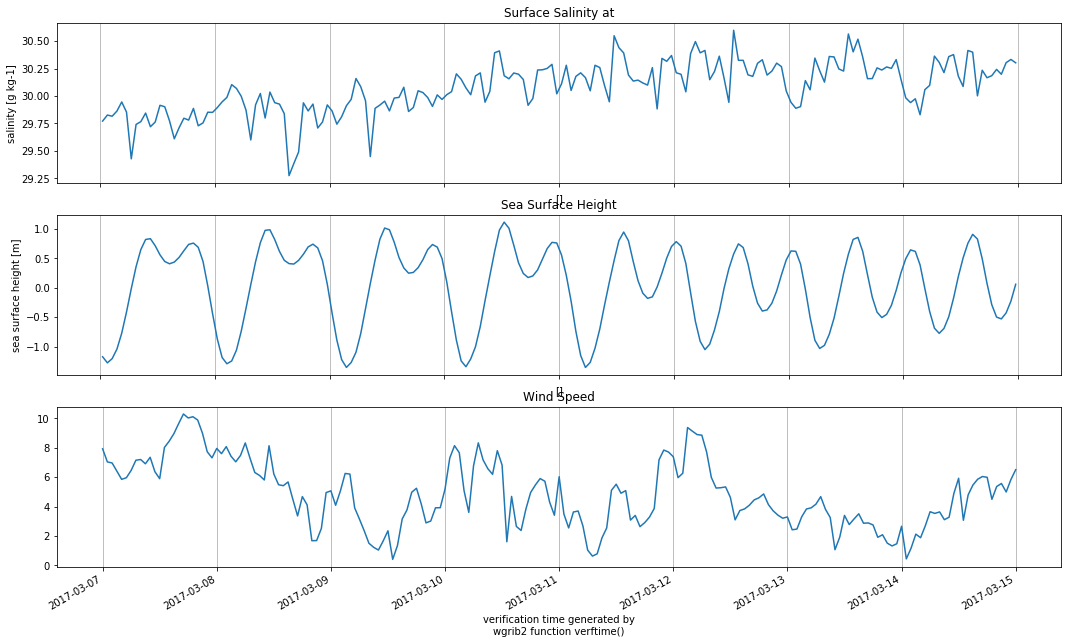

In [8]:
make_stats(slice('2017-03-07 00:00:00', '2017-03-15 00:00:00'), 'turn', graph = True)

turn
surface salinity mean = 30.0174
surface salinity min = 29.085245
surface salinity max = 30.573736
surface salinity std = 0.277864
ssh mean = -0.18042688
ssh min = -1.6297534
ssh max = 0.7932721
ssh std = 0.70448226
wind speed mean = 3.5476353
wind speed min = 0.1497804
wind speed max = 10.228392
wind speed std = 2.1144042


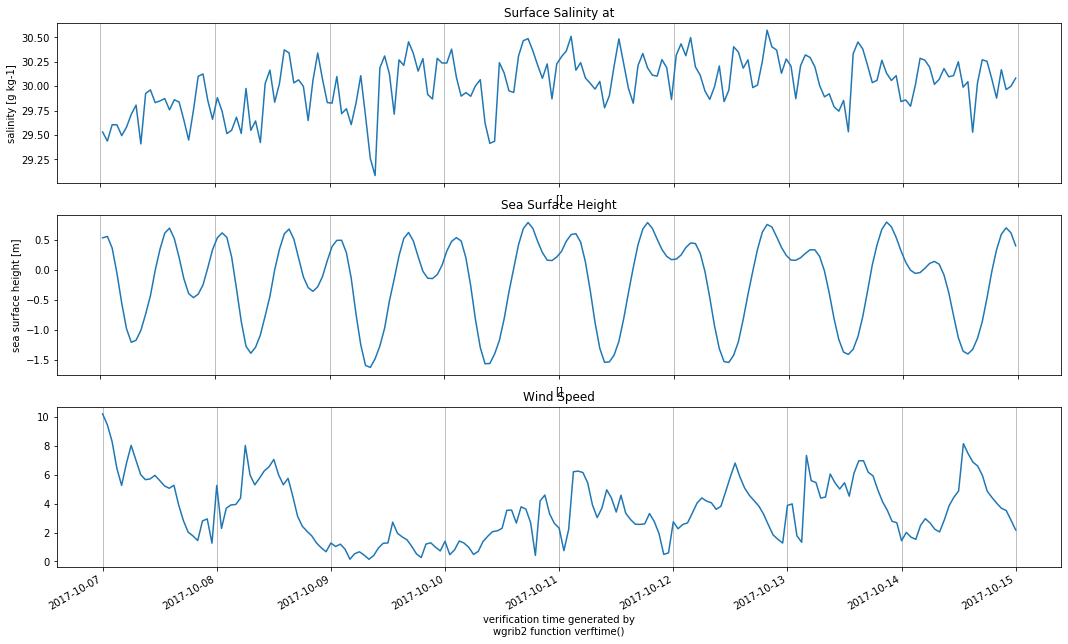

In [9]:
make_stats(slice('2017-10-07 00:00:00', '2017-10-15 00:00:00'), 'turn', graph = True)

turn
surface salinity mean = 28.713705
surface salinity min = 27.189644
surface salinity max = 29.954744
surface salinity std = 0.51237696
ssh mean = -0.10215148
ssh min = -1.7325073
ssh max = 0.9310507
ssh std = 0.6292824
wind speed mean = 2.7343616
wind speed min = 0.09794255
wind speed max = 9.108608
wind speed std = 1.6815805


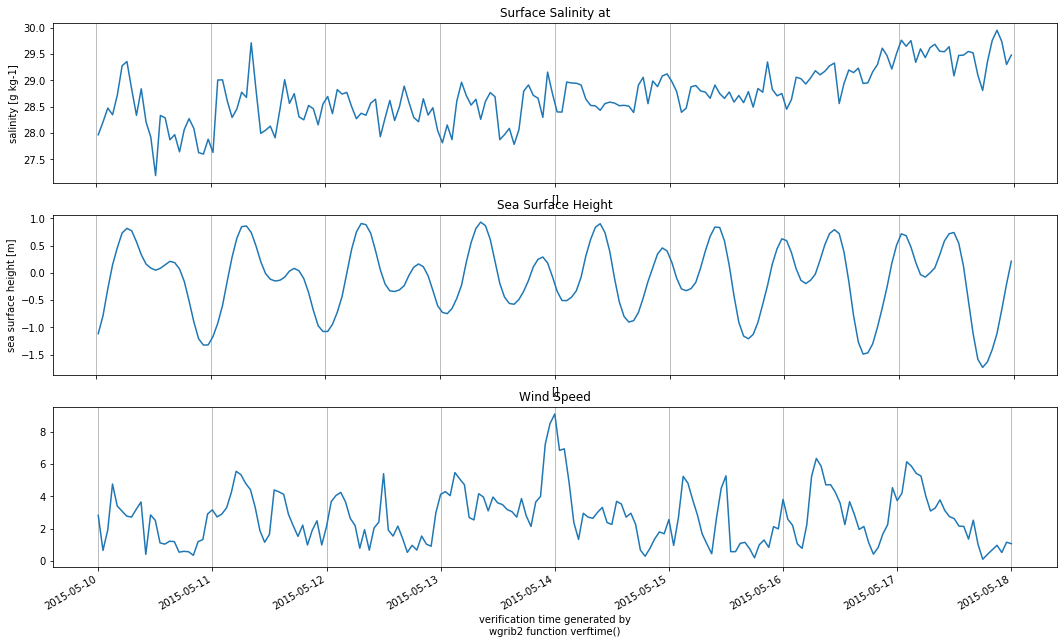

In [10]:
make_stats(slice('2015-05-10 00:00:00', '2015-05-18 00:00:00'), 'turn', graph = True)

turn
surface salinity mean = 27.15219
surface salinity min = 19.868288
surface salinity max = 29.615047
surface salinity std = 1.5356711
ssh mean = -0.036807146
ssh min = -1.9275753
ssh max = 1.142616
ssh std = 0.66670895
wind speed mean = 3.2987032
wind speed min = 0.06443351
wind speed max = 11.756465
wind speed std = 2.5304253


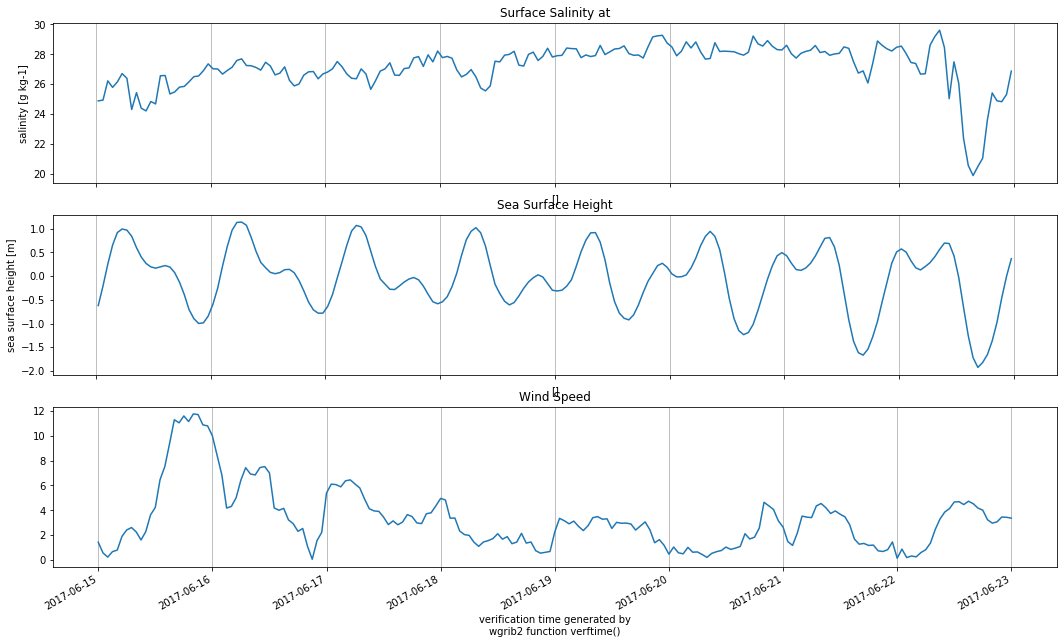

In [11]:
make_stats(slice('2017-06-15 00:00:00', '2017-06-23 00:00:00'), 'turn', graph = True)

turn
surface salinity mean = 30.807852
surface salinity min = 30.173706
surface salinity max = 31.191303
surface salinity std = 0.21172999
ssh mean = 0.17793095
ssh min = -1.4813118
ssh max = 1.4210591
ssh std = 0.7418747
wind speed mean = 6.4021378
wind speed min = 1.4822122
wind speed max = 14.317953
wind speed std = 2.3351018


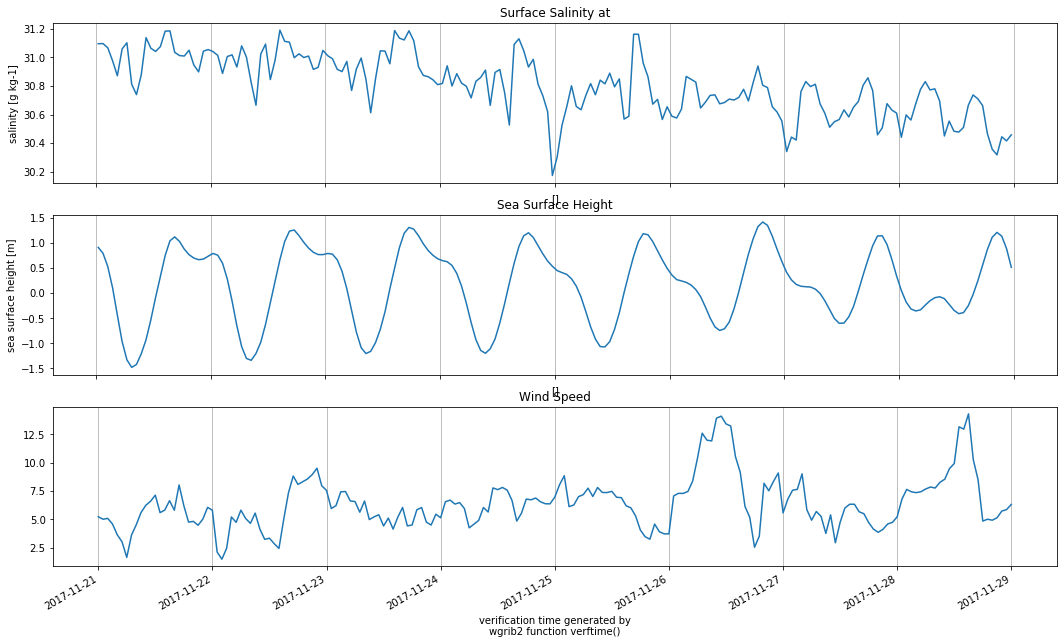

In [12]:
make_stats(slice('2017-11-21 00:00:00', '2017-11-29 00:00:00'), 'turn', graph = True)